# Testing CDEM Infrastructure

In [34]:
%reload_ext autoreload
%autoreload 2

# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid
from cdem_solvers import *
from consts import *
from utils import *
import time

# Setting plot parameters
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['figure.dpi'] = 150

## Dipole potential w. harmonic time dependence

Elapsed time: 1.05 seconds


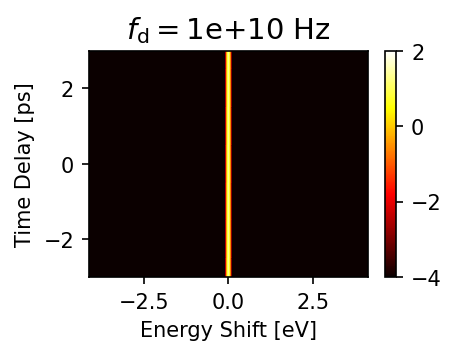

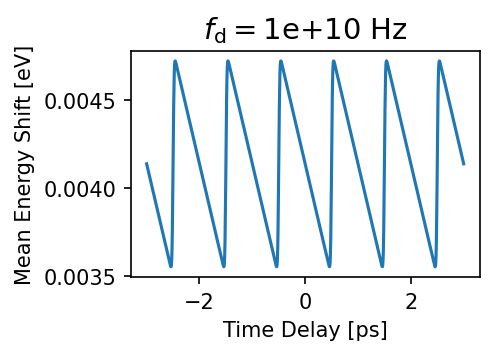

Elapsed time: 1.15 seconds


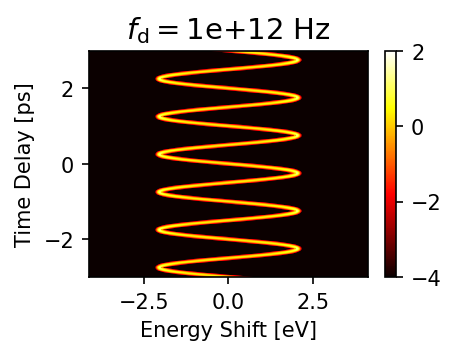

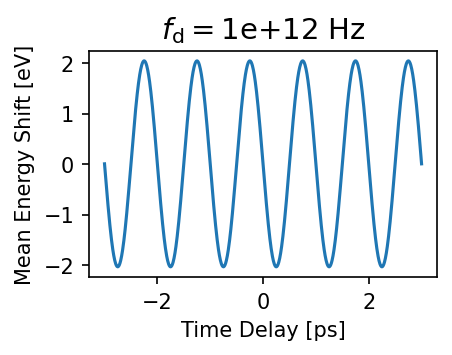

Elapsed time: 1.01 seconds


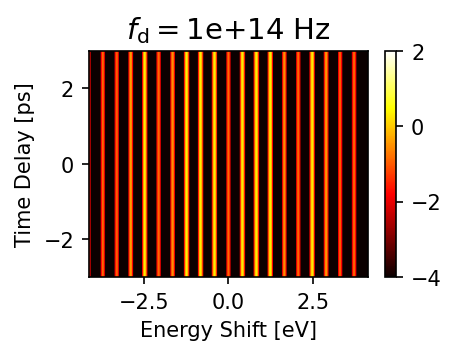

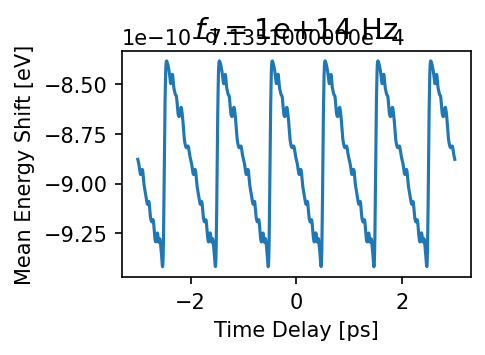

In [35]:
f_d_lst = [1e10, 1e12, 1e14] # Hz

delta_t_lst = np.linspace(-3e-12, 3e-12, 10 ** 3)

for i, f_d in enumerate(f_d_lst):
    solver = CDEMDipoleHarmonic(v=0.7*c,
                                energy_fwhm=0.07,
                                F_s=2e15,
                                z_max=1e-6,
                                d_z=1e-9,
                                L=2e3,
                                delta_t_lst=delta_t_lst,
                                orientation='xy',
                                d=1e-7,
                                d_min=2e-7,
                                N=5e4,
                                f_d=f_d)

    t_0 = time.time()
    psi_coherent = solver.solve_coherent()
    t_1 = time.time()

    print('Elapsed time: {:.2f} seconds'.format(t_1 - t_0))

    ax = plt.gca()
    plot_EELS(ax, psi_coherent, solver._omega_lst, solver._delta_t_lst, title='$f_\mathrm{{d}}=${:.0e} Hz'.format(f_d), color_min=-4, color_max=2)
    plt.show()
    
    ax = plt.gca()
    plot_mean_energy_shift(ax, psi_coherent, solver._omega_lst, solver._delta_t_lst, title='$f_\mathrm{{d}}=${:.0e} Hz'.format(f_d))
    plt.show()

## Harmonic dipole multiplied by a Gaussian

Energy quantum: 0.414 eV


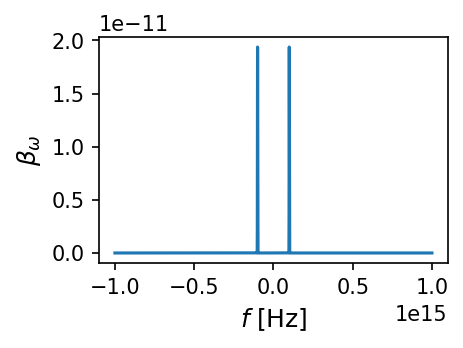

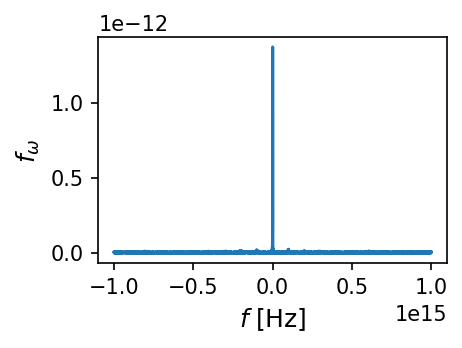

Elapsed time: 11.33 seconds


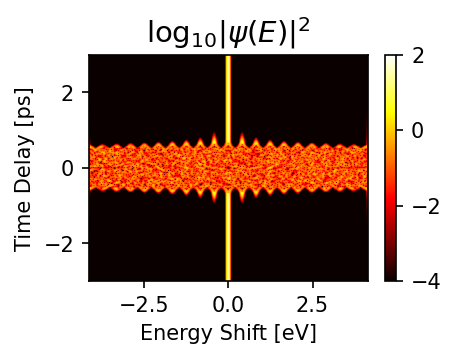

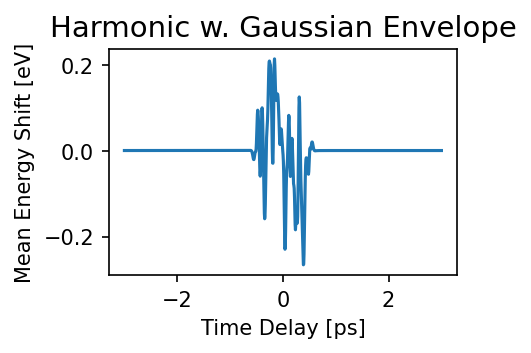

In [36]:
f_d = 1e14  # Hz
w_d = 2 * np.pi * f_d

print('Energy quantum: {:.3f} eV'. format(hbar * w_d / e))

delta_t_lst = np.linspace(-3e-12, 3e-12, 10 ** 3)

solver = CDEMDipoleHarmonicGaussian(v=0.7*c,
                            energy_fwhm=0.07,
                            F_s=2e15,
                            z_max=1e-6,
                            d_z=1e-9,
                            L=2e4,
                            delta_t_lst=delta_t_lst,
                            orientation='xy',
                            d=1e-7,
                            d_min=2e-7,
                            N=5e4,
                            f_d=f_d,
                            sigma_d=2e-13)

t_0 = time.time()
psi_coherent = solver.solve_coherent(debug=True)
t_1 = time.time()

print('Elapsed time: {:.2f} seconds'.format(t_1 - t_0))

ax = plt.gca()
plot_EELS(ax, psi_coherent, solver._omega_lst, solver._delta_t_lst, title='$\log_{10}|\psi(E)|^2$', color_min=-4, color_max=2)
plt.show()

ax = plt.gca()
plot_mean_energy_shift(ax, psi_coherent, solver._omega_lst, solver._delta_t_lst, title='Harmonic w. Gaussian Envelope')
plt.show()

## Transient dipole

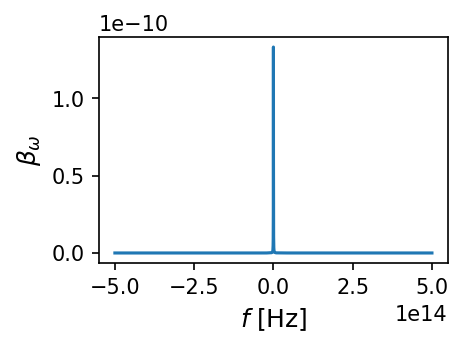

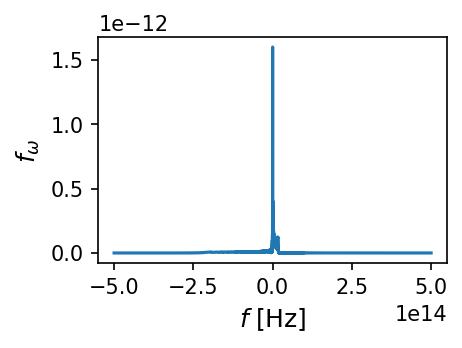

Elapsed time: 10.97 seconds


C:\Users\matan\OneDrive - Technion\Semester 7\114252 - Project T\cdem_proj\utils.py:81: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(psi[:-1, :-1]) ** 2),


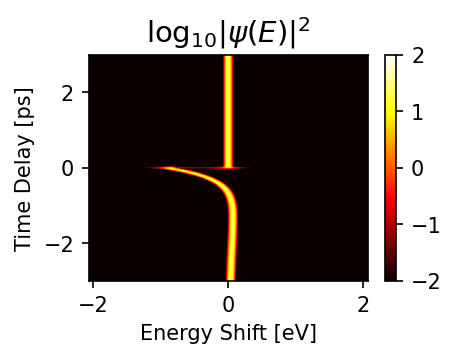

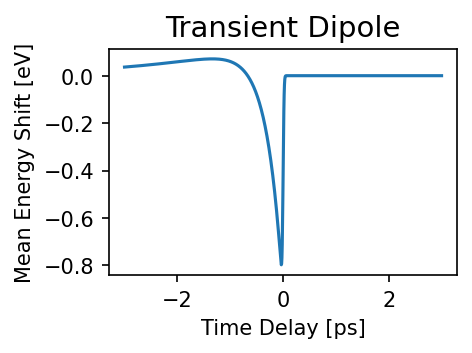

In [37]:
delta_t_lst = np.linspace(-3e-12, 3e-12, 10 ** 3)

solver = CDEMDipoleTransient(v=0.7*c,
                            energy_fwhm=0.07,
                            F_s=1e15,
                            z_max=1e-6,
                            d_z=1e-9,
                            L=2e4,
                            delta_t_lst=delta_t_lst,
                            orientation='xy',
                            d=1e-7,
                            d_min=2e-7,
                            N=5e4,
                            tau_r=3e-13,
                            tau_d=2e-12)

t_0 = time.time()
psi_coherent = solver.solve_coherent(debug=True)
t_1 = time.time()

print('Elapsed time: {:.2f} seconds'.format(t_1 - t_0))

ax = plt.gca()
plot_EELS(ax, psi_coherent, solver._omega_lst, solver._delta_t_lst, title='$\log_{10}|\psi(E)|^2$', color_min=-2, color_max=2)
plt.show()

ax = plt.gca()
plot_mean_energy_shift(ax, psi_coherent, solver._omega_lst, solver._delta_t_lst, title='Transient Dipole')
plt.show()